In [122]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel.data import PanelData
from linearmodels.panel import PanelOLS, PooledOLS, RandomEffects, compare
import matplotlib.pyplot as plt
from plot_result import plot_result

In [123]:
df=pd.read_csv("../../data/merged/len4_ndb_DN.csv",encoding="shift-jis",index_col=0)

In [124]:
df=df.loc[df["総計"]>0]
df=df.loc[df["revenue"]>0]
df=df.loc[df["generic_share_q"]>0]
df["price"]=df["revenue"]/df["総計"]
df["log_quantity"]=np.log(df["総計"])
df["log_revenue"]=np.log(df["revenue"])
df_generic=df.copy()
df_branded=df.copy()
df_branded=df_branded.loc[df_branded["後発品区分"]==0]
df_generic=df_generic.loc[df_generic["後発品区分"]==1]
df_branded=df_branded.set_index(["id","year"])
df_generic=df_generic.set_index(["id","year"])
df=df.set_index(["id","year"])
df_branded=PanelData(df_branded,convert_dummies=False)
df_generic=PanelData(df_generic,convert_dummies=False)
df=PanelData(df,convert_dummies=False)

In [125]:
# # all data
# formula="log_quantity~ elapsed_m7+elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+TimeEffects+EntityEffects"

# # till elapsed_20
# # formula="log_quantity~ elapsed_m7+elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+elapsed_11+elapsed_12+elapsed_13+elapsed_14+elapsed_15+TimeEffects+EntityEffects"


# # add generic indicator
# formula+="+後発品区分"

# # add generic per
# formula+="+generic_per"
# # generic_share_r
# formula+=" + generic_share_r"
# # generic_share_q
# formula+=" + generic_share_q"

# mod_fe=PanelOLS.from_formula(formula, data=df,check_rank=False,drop_absorbed=True)
# res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
# print(res_fe.summary.tables[1])
# # print(res_fe.summary.tables[0])
# # print(res_fe)
# # plot_result(res_fe,file_name="ndb_all",title="ndb_all",start_from=1,period=15)
# plot_result(res_fe,file_name="ndb_all",title="ndb_all")

                                  Parameter Estimates                                   
                      Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------------
elapsed_m7              -0.1640     0.0660    -2.4831     0.0139     -0.2942     -0.0337
elapsed_m6              -0.2253     0.0569    -3.9580     0.0001     -0.3376     -0.1130
elapsed_m5              -0.1251     0.0476    -2.6280     0.0093     -0.2190     -0.0312
elapsed_m4              -0.0847     0.0307    -2.7553     0.0065     -0.1454     -0.0241
elapsed_m3              -0.1059     0.0261    -4.0549     0.0001     -0.1574     -0.0544
elapsed_m2              -0.0693     0.0254    -2.7267     0.0070     -0.1194     -0.0192
elapsed_0                0.0021     0.0379     0.0550     0.9562     -0.0727      0.0769
elapsed_1               -0.0495     0.0398    -1.2458     0.2144     -0.1280      0.0289
elapsed_2            

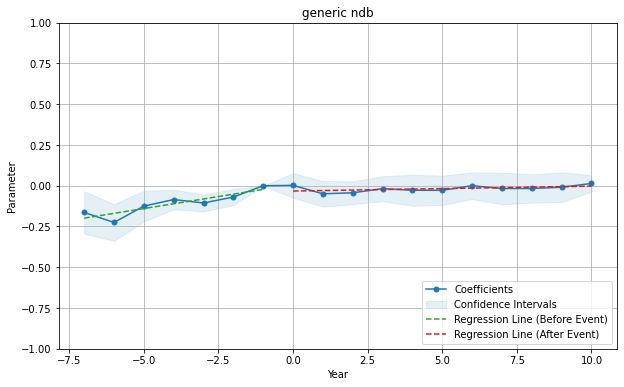

In [126]:
# generic data
formula="log_quantity~elapsed_m7+elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+TimeEffects+EntityEffects"

# till elapsed_20
# formula="log_quantity~ elapsed_m7+elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+elapsed_11+elapsed_12+elapsed_13+elapsed_14+elapsed_15+TimeEffects+EntityEffects"

# add generic_per
formula+="+log(generic_per)"
# generic_share_r
# formula+=" + generic_share_r"
# generic_share_q
# formula+="+log(薬価)"
formula+=" + log(generic_share_q)"
formula+="+log(price)"

mod_fe=PanelOLS.from_formula(formula, data=df_generic,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
# print(res_fe)
# plot_result(res_fe,file_name="ndb_generic",title="generic ndb",start_from=1,period=15)
plot_result(res_fe,file_name="ndb_generic",title="generic ndb",start_from=1)

                          PanelOLS Estimation Summary                           
Dep. Variable:           log_quantity   R-squared:                        0.3532
Estimator:                   PanelOLS   R-squared (Between):             -0.1465
No. Observations:                 241   R-squared (Within):              -15.365
Date:                Thu, Dec 28 2023   R-squared (Overall):             -0.2822
Time:                        18:40:00   Log-likelihood                    179.67
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5.2884
Entities:                          31   P-value                           0.0000
Avg Obs:                       7.7742   Distribution:                  F(19,184)
Min Obs:                       3.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             9.0695
                            

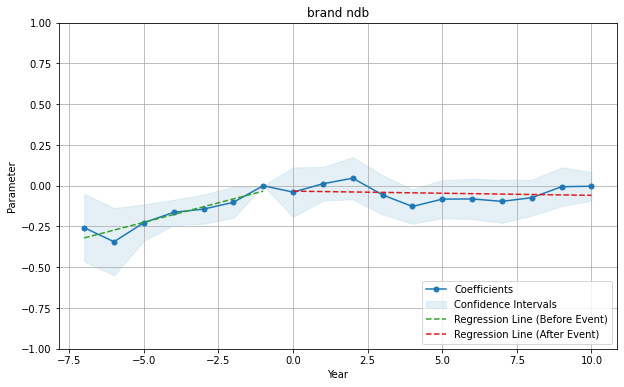

In [127]:
# branded data
formula="log_quantity~ elapsed_m7+elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+TimeEffects+EntityEffects"

# till elapsed_20
# formula="log_quantity~ elapsed_m7+elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+elapsed_11+elapsed_12+elapsed_13+elapsed_14+elapsed_15+TimeEffects+EntityEffects"
# add generic_per
formula+="+log(generic_per)"
# generic_share_r
# formula+=" + generic_share_r"
# generic_share_q
formula+=" + log(generic_share_q)"
# formula+=" + log(薬価)"
formula+="+log(price)"

mod_fe=PanelOLS.from_formula(formula, data=df_branded,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
# print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
print(res_fe)
# plot_result(res_fe,file_name="ndb_brand",title="brand ndb",start_from=1,period=15)
plot_result(res_fe,file_name="ndb_brand",title="brand ndb")
